In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

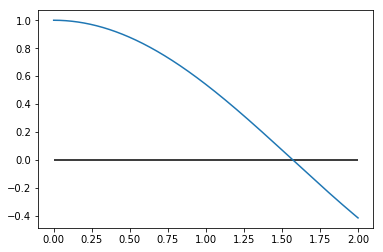

In [2]:
def f(x):
    return np.cos(x)

xmin=0
xmax=2
x=np.linspace(xmin,xmax,1000)

plt.plot(x,f(x))
plt.hlines(0,xmin,xmax)

# Método de bisección
<img src="bis.png" alt="drawing" width="500"/>

#### Algoritmo
0. Semillas $f(x), a, b$


1. Check $f(a)f(b) < 0$


2. $p=\frac{a+b}{2}$


3. Si $f(a)f(p)<0$ entonces $b=p$


4. Si $f(p)f(b)<0$ entonces $a=p$


5. Repetir hasta que se cumpla alguna: 
$$|f(p)|<Tolerancia\approx 0   \checkmark$$ 

$$N_{iter}=N_{max}$$

$$|p_n-p_{n-1}|<Resolucion\approx 0$$

$$\frac{|p_n-p_{n-1}|}{|p_n|}< Resolución \%$$

In [3]:
def biseccion(f,a,b,tol):
  if f(a)*f(b)>=0:
    return 'Error'

  else:
    p=(a+b)/2
    n=0
    while abs(f(p))>tol:

      if f(a)*f(p)<0:
        b=p
      if f(p)*f(b)<0:
        a=p

      p=(a+b)/2
      n+=1
    print('Raiz encontrada en',n,'iteraciones')

    return p


In [4]:
tolbis=1e-16
rootbis=biseccion(f,0,2,tolbis)
print(rootbis)

Raiz encontrada en 49 iteraciones
1.5707963267948966


# Método de punto fijo
<img src="fp.png" alt="drawing" width="500"/>

#### Algoritmo
0. Semillas $f(x), p_0$


1. Escribir $f(x)=g(x)-x$ o construir $g(x)=f(x)+x$


2. $f(p_0) =g(p_0) -p_0$


3. $p_n=g(p_n)$


4. Repetir hasta que se cumpla alguna: 
$$|f(p)|<Tolerancia\approx 0$$

$$N_{iter}=N_{max} \checkmark$$

$$|p_n-p_{n-1}|<Resolucion\approx 0$$

$$\frac{|p_n-p_{n-1}|}{|p_n|}< Resolución \%$$

# Cuidado con la convergencia
<img src="fp2.jpg" alt="drawing" width="500"/>

#### Capítulo 2: Burden - Numerical analysis

In [5]:
def punto_fijo(f,p,Nmax):
  def g(x):
    return f(x)+x

  n=0
  while n<Nmax:
    p=g(p)
    n+=1

  return p

In [6]:
Npf=3

rootpf=punto_fijo(f,2,Npf)
print(rootpf)
print(abs(f(rootpf)))


1.5707963267948966
6.123233995736766e-17


# Método de Newton-Raphson (Newton)
<img src="nr.png" alt="drawing" width="500"/>

#### Algoritmo
0. Semillas $f(x), p_0$


1. Derivar $f(x)$ ...... $f'(x)=\frac{df}{dx}$ 


2. $p_n=p_{n-1} -\frac{f(p_{n-1})}{f'(p_{n-1})}$


3. Repetir hasta que se cumpla alguna: 
$$|f(p)|<Tolerancia\approx 0 \checkmark$$

$$N_{iter}=N_{max}$$

$$|p_n-p_{n-1}|<Resolucion\approx 0$$

$$\frac{|p_n-p_{n-1}|}{|p_n|}< Resolución \%$$

# Cuidado con la convergencia
<img src="nr2.png" alt="drawing" width="500"/>

#### Capítulo 2: Burden - Numerical analysis

In [7]:
def f(x):
  return np.cos(x)

def df(x):
  return -np.sin(x)

def Newton_Rhapson(p,tol):
  n=0
  while abs(f(p))>tol:
    p=p-f(p)/df(p)
    n+=1
  print('Raiz encontrada en',n,'iteraciones')
  return p

In [8]:
tolnr=1e-16
rootnr=Newton_Rhapson(1,tolnr)

print(rootnr)

Raiz encontrada en 4 iteraciones
1.5707963267948966


# Método de Secante
<img src="sec1.png" alt="drawing" width="500"/>

#### Algoritmo
0. Semillas $f(x), p_0, p_1$


1. $p_2=p_1-\frac{f(p_1)(p_1 - p_0)}{f(p_1)-f(p_0)}$


2. $p_n=p_{n-1}-\frac{f(p_{n-1})(p_{n-1} - p_{n-2})}{f(p_{n-1})-f(p_{n-2})}$


3. Repetir hasta que se cumpla alguna: 
$$|f(p)|<Tolerancia\approx 0  $$ 

$$N_{iter}=N_{max}$$

$$|p_n-p_{n-1}|<Resolucion\approx 0 \checkmark$$

$$\frac{|p_n-p_{n-1}|}{|p_n|}< Resolución \%$$


# Cuidado con la convergencia 

$f(p_{n-1}) \neq f(p_{n-2})$

In [9]:
def secante(f,p0,p1,resolution):
    n=0
    
    pn_1=p1
    pn_2=p0
    
    res=resolution
    
    while abs(pn_1-pn_2) > res:
        pn=pn_1-(f(pn_1)*(pn_1-pn_2))/(f(pn_1)-f(pn_2))
        
        pn_2 = pn_1 +0.
        pn_1 = pn + 0.
        
        n+=1

    print('Raiz encontrada en',n,'iteraciones')
    return pn


Raiz encontrada en 6 iteraciones


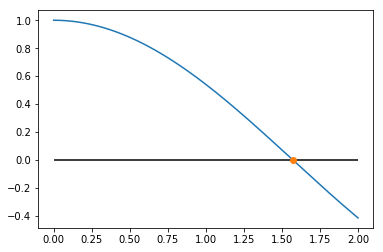

In [10]:
ressec=1e-16

rootsec=secante(f,0,2,ressec)

plt.plot(x,f(x))
plt.plot(rootsec,f(rootsec),'o')
plt.hlines(0,xmin,xmax)

# Método de Posición falsa (Regla Falsa o Regula Falsi)

Combina el método de la secante con el método de bisección

<img src="regfal1.png" alt="drawing" width="500"/>

#### Algoritmo
0. Semillas $f(x), a, b$


1. Check $f(a)f(b) < 0$


2. $p=b-\frac{f(b)(b-a)}{f(b)-f(a)}$


3. Si $f(a)f(p)<0$ entonces $b=p$


4. Si $f(p)f(b)<0$ entonces $a=p$


5. Repetir hasta que se cumpla alguna: 
$$|f(p)|<Tolerancia\approx 0   $$ 

$$N_{iter}=N_{max}$$

$$|p_n-p_{n-1}|<Resolucion\approx 0 \checkmark$$

$$\frac{|p_n-p_{n-1}|}{|p_n|}< Resolución \%$$

In [11]:
def regla_falsa(f,a,b,resolution):
    if f(a)*f(b)>=0:
        return 'Error f(a) y f(b) deben tener signo contrario'
    
    res=resolution
    n=0
    
    while abs(a-b)>res:
        
        p=b-(f(b)*(b-a))/(f(b)-f(a))
        if f(a)*f(p)<0:
            
            b=p
        if f(p)*f(b)<0:
            a=p
        
        n+=1
        
    print('Raiz encontrada en ', n,' iteraciones')
    
    return p

Raiz encontrada en  5  iteraciones


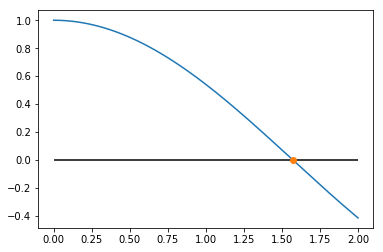

In [12]:
resregfal=1e-6

rootregfal=regla_falsa(f,0,2,resregfal)

plt.plot(x,f(x))
plt.plot(rootregfal,f(rootregfal),'o')
plt.hlines(0,xmin,xmax)

# Aplicación Física

### Ecuación de Kepler

$M(t)=E-\epsilon \sin(E)$

donde:

$M(t)=\sqrt{\frac{GM}{a^3}}t$

$x=a(\cos(E)-\epsilon)$

$y=b\sin(E)$

$b=a\sqrt{1-\epsilon^2}$

- $M$: anomalia media
- $E$: anomalía excentrica
- $\epsilon$: Excentricidad
- $G$: Constante gravitacional
- $M$: Masa cuerpo central
- $a$: Semieje mayor
- $b$: Semieje menor

#### Problema

Un satelite orbita la tierra en una trayectoria ecuatorial con excentricidad $\epsilon=0.5$ a una distancia  geoestacionaria para el semi-eje mayor. Grafique $x(t)$ y $y(t)$ dentro del plano orbital en intervalos de 15 minutos por lo menos durante 5 horas.

##### Parametros en SI

- $\epsilon=0.5$
- $G=6.674\times10^{-11}$ 
- $M_{tierra}=5.972\times10^{24}$
- $a=35900\times10^3$ 

In [13]:
#Parametros

eps=0.5
G=6.674e-11
M=5.972e24
a=35900e3

b = a*(1-eps**2.0)**0.5
n = ( G*M/a**3.0 )**0.5

#Tiempos
tmax= 20 * 60 * 60
dt=15*60
t_array=np.arange(0,tmax,dt)

#Ecuaciones
def kepler(E):
    return E-eps*np.sin(E)-n*t

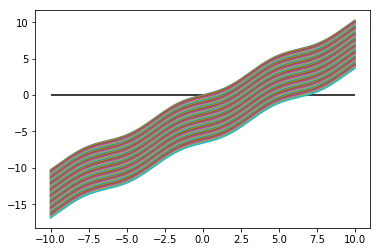

In [14]:
E_try=np.linspace(-10,10,1000)
for t in t_array:
    plt.plot(E_try,kepler(E_try))
plt.hlines(0,-10,10)

Raiz encontrada en 0 iteraciones
Raiz encontrada en 50 iteraciones
Raiz encontrada en 50 iteraciones
Raiz encontrada en 50 iteraciones
Raiz encontrada en 51 iteraciones
Raiz encontrada en 52 iteraciones
Raiz encontrada en 51 iteraciones
Raiz encontrada en 52 iteraciones
Raiz encontrada en 51 iteraciones
Raiz encontrada en 50 iteraciones
Raiz encontrada en 51 iteraciones
Raiz encontrada en 51 iteraciones
Raiz encontrada en 50 iteraciones
Raiz encontrada en 50 iteraciones
Raiz encontrada en 51 iteraciones
Raiz encontrada en 52 iteraciones
Raiz encontrada en 53 iteraciones
Raiz encontrada en 52 iteraciones
Raiz encontrada en 47 iteraciones
Raiz encontrada en 53 iteraciones
Raiz encontrada en 53 iteraciones
Raiz encontrada en 53 iteraciones
Raiz encontrada en 51 iteraciones
Raiz encontrada en 52 iteraciones
Raiz encontrada en 52 iteraciones
Raiz encontrada en 53 iteraciones
Raiz encontrada en 53 iteraciones
Raiz encontrada en 53 iteraciones
Raiz encontrada en 50 iteraciones
Raiz encontrada

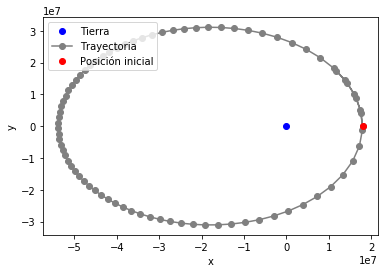

In [15]:
E_sol=np.zeros(len(t_array))
tol=1e-15
a0=-10
b0=10

i=0

for t in t_array:
    E_sol[i]=biseccion(kepler,a0,b0,tol)
    i+=1
    
x=a*(np.cos(E_sol)-eps)
y=b*np.sin(E_sol)

plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(0,0,'o',color='blue',label='Tierra')
plt.plot(x,y,'o-',color='gray',label='Trayectoria')
plt.plot(x[0],y[0],'o',color='red',label='Posición inicial')
plt.legend(loc=2)